In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances_argmin

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [2]:
# Read the data
features = pd.read_csv('./medical/historical_X.dat', header=None, sep=" ").values
actions = pd.read_csv('./medical/historical_A.dat', header=None, sep=" ").values
outcome = pd.read_csv('./medical/historical_Y.dat', header=None, sep=" ").values
observations = features[:, :128]
labels = features[:,128] + features[:,129]*2

In [3]:
features.shape

(10000, 130)

In [4]:
observations.shape

(10000, 128)

In [5]:
no_symptoms = features[np.where(features[:,129] == 0)]
no_symptoms.shape

(9027, 130)

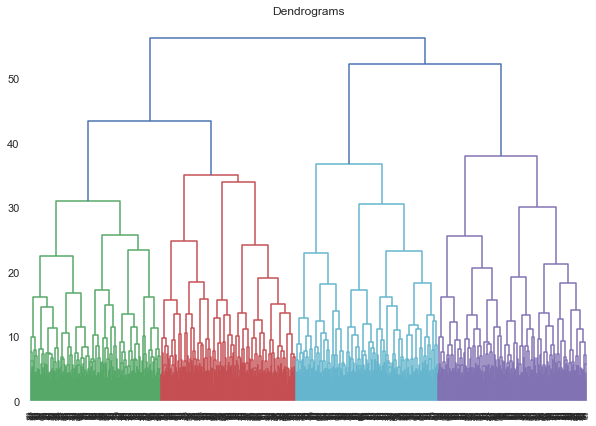

In [47]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(symptoms_true, method='ward'))
plt.show()

In [6]:
k = 5

cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
#euclidean = distance between datapoints, 'ward' = minimizes the variant between the clusters
h_clusters = cluster.fit_predict(observations)

print(h_cluster.labels_)

[3 1 2 ... 4 2 1]


In [7]:
def find_clusters(X, n_clusters, rseed = 2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, k_clusters

In [8]:
centers, k_clusters = find_clusters(observations, k)

In [9]:
k_clusters

array([3, 4, 2, ..., 0, 0, 4])

In [10]:
h_clusters

array([3, 1, 2, ..., 4, 2, 1])

(10000, 1)

In [12]:
obs_clusters = np.append(observations , clusters[:,None], 1)
obs_clusters1 = np.append(observations, labels[:,None], 1)

In [13]:
obs_clusters = np.append(obs_clusters, labels[:,None], 1)
obs_clusters1 = np.append(obs_clusters1, labels[:,None], 1)

In [14]:
obs_clusters.shape

# last column (130) is labels
# 129 is clusters 

(10000, 130)

In [15]:
labels[:20]

array([3, 4, 2, 2, 4, 0, 2, 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 0, 2, 1])

In [16]:
obs_clusters

array([[0, 0, 0, ..., 0, 3, 3],
       [0, 1, 0, ..., 1, 1, 4],
       [0, 0, 1, ..., 1, 2, 2],
       ...,
       [0, 0, 1, ..., 0, 4, 0],
       [1, 1, 0, ..., 1, 2, 0],
       [1, 0, 0, ..., 1, 1, 4]])

In [83]:
symptoms_true = obs_clusters[np.where(obs_clusters[:,129] != 0)]
symptoms_true.shape

(5168, 130)

In [84]:
symptoms_false = obs_clusters[np.where(obs_clusters[:,129] == 0)]
symptoms_false.shape

(4832, 130)

Text(0.5, 1.0, 'countplot clusters')

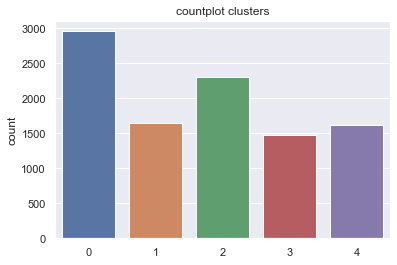

In [89]:
sns.countplot(clusters)
plt.title('countplot clusters')

Text(0.5, 1.0, 'countplot clusters no symptoms')

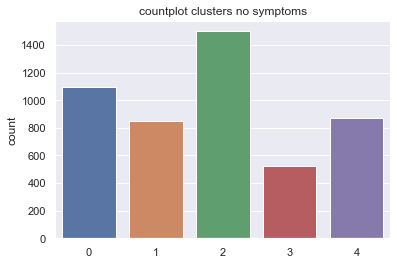

In [90]:
clusters_no_symp = symptoms_false[:,128]

sns.countplot(clusters_no_symp)
plt.title('countplot clusters no symptoms')

Text(0.5, 1.0, 'countplot clusters symptoms')

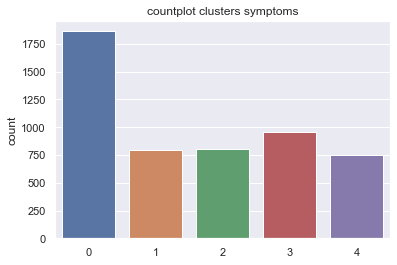

In [91]:
clusters_symp = symptoms_true[:,128]

sns.countplot(clusters_symp)
plt.title('countplot clusters symptoms')

It looks like there are more people with symptoms in the 0 cluster, while people without symptoms are in the 2 cluster. 

In [4]:
np.random.seed(200)
Xtrain, Xholdout, ytrain, yholdout = train_test_split(features, outcome, test_size = 0.5)

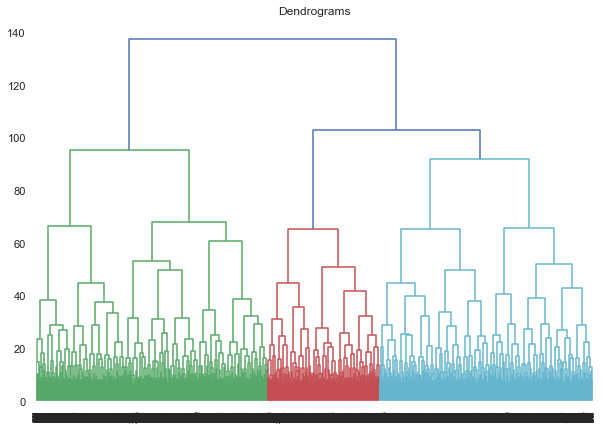

In [4]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(observations, method='ward'))
plt.show()